## 1. Import Dependencies

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split

## 2. Define Constants

In [3]:
plot_upadate_rate = 1  # Number of Epochs After which to update the Plot

num_data_points = 1000  # Number of Data Points to train on

max_x = 6.12  # Max Range on X axes

## 3. Generate data

In [4]:
X = np.linspace(-max_x, max_x, num_data_points)
Y = np.sin(X)

# Split the data using sklearn train_test_split
x_train, _, y_train, _ = train_test_split(X, Y, test_size=500, shuffle=True)

## 4. Define the Model

In [5]:
# Define the Keras sequential model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(100, activation="relu", input_shape=(1,)),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1, activation=None),  # Linear activation for regression
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

c:\Users\syeta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. Define Callbacks

In [6]:
plot_dir = 'saved_plots'
os.makedirs(plot_dir, exist_ok=True)

# Function to update the plot
def update_plot(epoch, logs):
    if epoch % plot_upadate_rate == 0:
        y_pred = model.predict(X, verbose=0)

        plt.clf()
        # Set y-axis limits
        plt.ylim(-1.5, 1.5)
        # plt.xlim(-max_x, max_x)

        plt.plot(X, Y, label="True", color="red")
        plt.plot(X, y_pred, label="Training", color="green")
        plt.title(f"Epoch: {epoch + 1}")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        
        # Save the plot with a suitable name
        plot_filename = os.path.join(plot_dir, f'plot_epoch_{epoch}.png')
        plt.savefig(plot_filename)

In [7]:
# Callback to update the plot during training
plot_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=update_plot)

## 6. Train the Model

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.4994
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3941
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3831
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3331
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2492
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2247
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1508
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1212
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0875
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0955
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0896
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0858
Epoch 13/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0776
Epoch 14/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0837
Epoch 15/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - lo

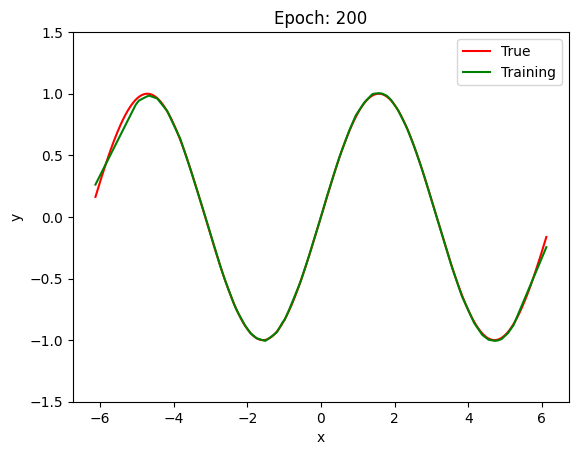

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=200, callbacks=[plot_callback])

## 7. Check Performance

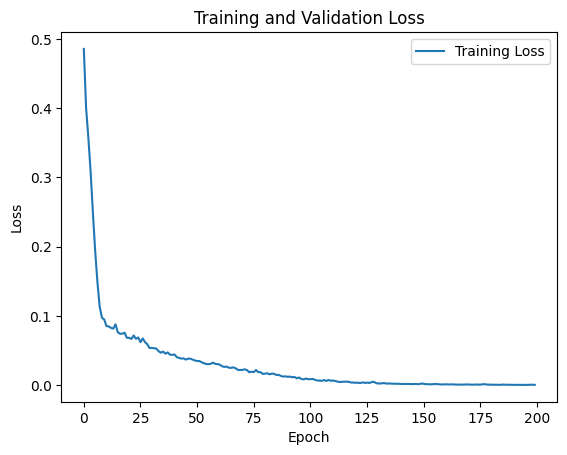

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("model_performance.png")
plt.show()

## 8. Test the Model

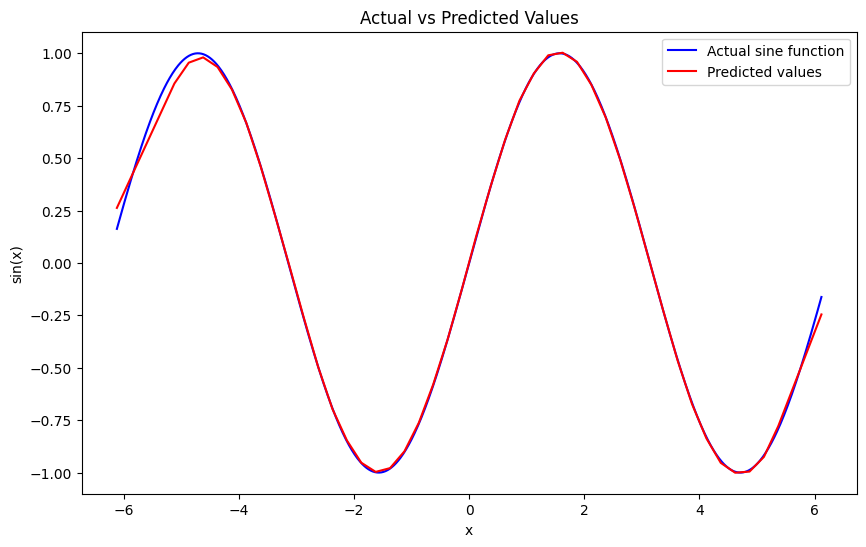

In [10]:
# Define test data for plotting
x_test = np.linspace(-max_x, max_x, 50)
# Make predictions on the test data
y_pred = model.predict(x_test, verbose=0)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='Actual sine function', color='blue')
plt.plot(x_test, y_pred, label='Predicted values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.savefig('tested_values.png')
plt.show()

## 9. Save the Model 

In [11]:
model.save("sine_model.keras")